Итак. Для начала нам надо разбить файл на строки и занесения их в одну базу данных. Для этого мы включим функцию загрузки данных из файла и с помощью цикла будем разбивать файл

In [33]:
import pandas as pd

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []

    if current_block:
        blocks.append(current_block)

    dfs = []
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["Height", "Factor1", "Factor2", "Temp", "Rate", "Value"])
        dfs.append(df)
    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

print(data)

      Height  Factor1  Factor2  Temp      Rate    Value
0      800.0      0.0   0.3048  71.3  0.002663  126.201
1     1000.0      0.0   0.3048  71.3  0.002663  125.201
2     1250.0      0.0   0.3048  71.3  0.002663  125.951
3     1600.0      0.0   0.3048  71.3  0.002663  127.591
4     2000.0      0.0   0.3048  71.3  0.002663  127.461
...      ...      ...      ...   ...       ...      ...
1498  2500.0     15.6   0.1016  39.6  0.052849  110.264
1499  3150.0     15.6   0.1016  39.6  0.052849  109.254
1500  4000.0     15.6   0.1016  39.6  0.052849  106.604
1501  5000.0     15.6   0.1016  39.6  0.052849  106.224
1502  6300.0     15.6   0.1016  39.6  0.052849  104.204

[1503 rows x 6 columns]


Теперь когда наш файл разбит и с ним можно работать. Начнём описательный анализ с помощью .describe()

In [36]:
import pandas as pd

def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    blocks = []
    current_block = []

    for line in lines:
        stripped = line.strip()
        if stripped:
            current_block.append(stripped)
        else:
            if current_block:
                blocks.append(current_block)
                current_block = []

    if current_block:
        blocks.append(current_block)

    dfs = []
    for block in blocks:
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["Height", "Factor1", "Factor2", "Temp", "Rate", "Value"])
        dfs.append(df)
    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

file_path = "airfoil_self_noise.dat"
data = load_data_from_file(file_path)

print(data.describe())

             Height      Factor1      Factor2         Temp         Rate  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
std     3152.573137     5.918128     0.093541    15.572784     0.013150   
min      200.000000     0.000000     0.025400    31.700000     0.000401   
25%      800.000000     2.000000     0.050800    39.600000     0.002535   
50%     1600.000000     5.400000     0.101600    39.600000     0.004957   
75%     4000.000000     9.900000     0.228600    71.300000     0.015576   
max    20000.000000    22.200000     0.304800    71.300000     0.058411   

             Value  
count  1503.000000  
mean    124.835943  
std       6.898657  
min     103.380000  
25%     120.191000  
50%     125.721000  
75%     129.995500  
max     140.987000  


Согласно данным в целом большой разброс диапазона значений имеет только высота (3152). Самое низкое у Rate (0,01) и Factor2 (0,09). У Temp и Value разброс очень умеренный


      Height  Factor1  Factor2  Temp      Rate    Value
0      800.0      0.0   0.3048  71.3  0.002663  126.201
1     1000.0      0.0   0.3048  71.3  0.002663  125.201
2     1250.0      0.0   0.3048  71.3  0.002663  125.951
3     1600.0      0.0   0.3048  71.3  0.002663  127.591
4     2000.0      0.0   0.3048  71.3  0.002663  127.461
...      ...      ...      ...   ...       ...      ...
1498  2500.0     15.6   0.1016  39.6  0.052849  110.264
1499  3150.0     15.6   0.1016  39.6  0.052849  109.254
1500  4000.0     15.6   0.1016  39.6  0.052849  106.604
1501  5000.0     15.6   0.1016  39.6  0.052849  106.224
1502  6300.0     15.6   0.1016  39.6  0.052849  104.204

[1503 rows x 6 columns]
Descriptive Statistics:
             Height      Factor1      Factor2         Temp         Rate  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745     0.011140   
std     3152.573137     5.918128     0.093541    15.57

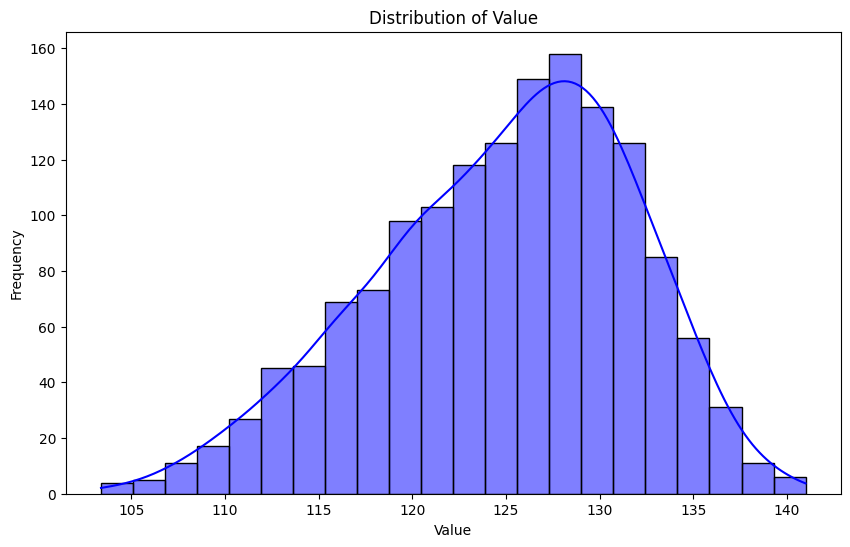

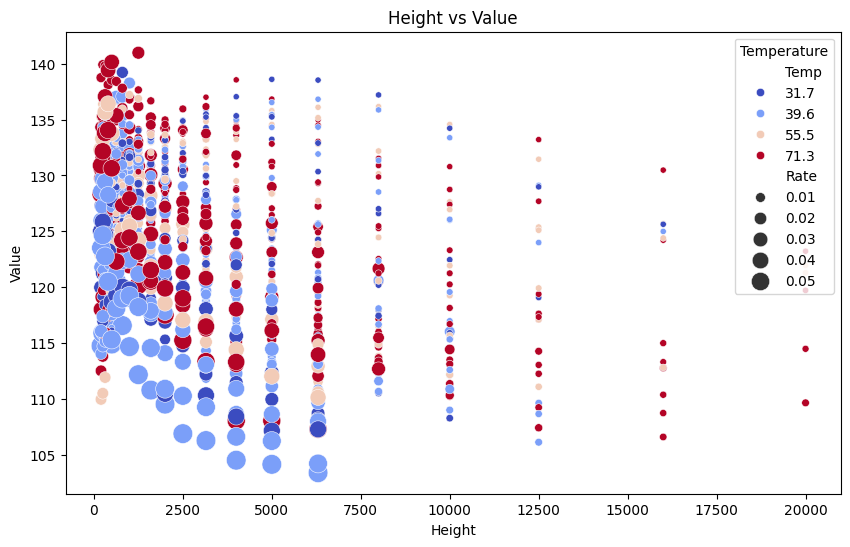

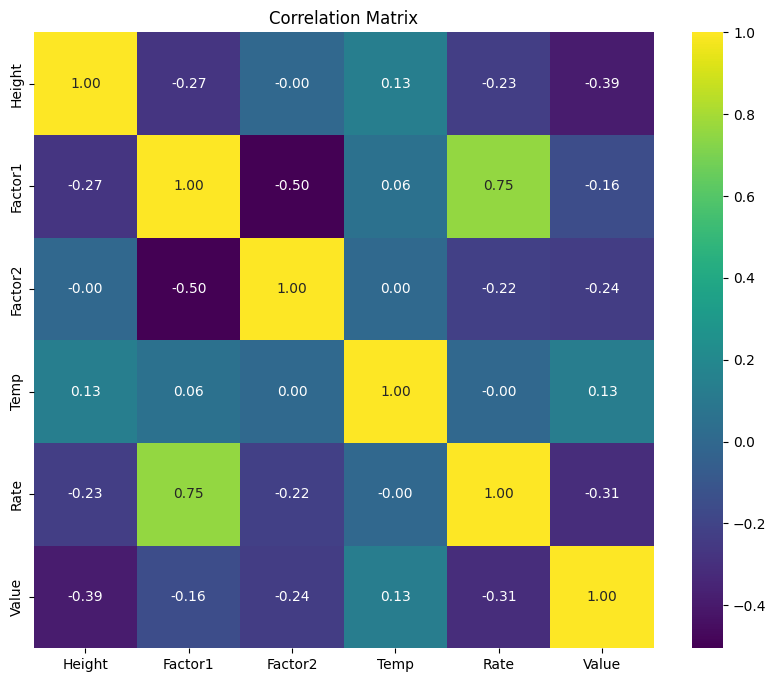

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для загрузки данных из файла
def load_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Список для хранения всех блоков данных
    blocks = []
    current_block = []

    # Разделение на блоки данных
    for line in lines:
        stripped = line.strip()
        if stripped:  # Если строка не пустая
            current_block.append(stripped)
        else:  # Если строка пустая, значит, блок завершен
            if current_block:
                blocks.append(current_block)
                current_block = []
    
    # Добавление последнего блока, если файл не заканчивается пустой строкой
    if current_block:
        blocks.append(current_block)

    # Преобразование каждого блока в DataFrame
    dfs = []
    for block in blocks:
        # Преобразуем блок текста в список строк, затем в DataFrame
        data = [list(map(float, row.split())) for row in block]
        df = pd.DataFrame(data, columns=["Height", "Factor1", "Factor2", "Temp", "Rate", "Value"])
        dfs.append(df)

    # Объединяем все DataFrame в один
    full_df = pd.concat(dfs, ignore_index=True)
    return full_df

# Пример использования
file_path = "airfoil_self_noise.dat"  # Замените на путь к вашему файлу
data = load_data_from_file(file_path)

# Проверяем загруженные данные
print(data)

# Описательная статистика
print("Descriptive Statistics:")
print(data.describe())

# Построение графиков

# График распределения Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Value'], bins='auto', kde=True, color='blue')
plt.title("Distribution of Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Взаимосвязь Height и Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Height', y='Value', hue='Temp', palette='coolwarm', size='Rate', sizes=(20, 200))
plt.title("Height vs Value")
plt.xlabel("Height")
plt.ylabel("Value")
plt.legend(title='Temperature')
plt.show()

# Корреляция между переменными
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
